# First let's import the data

In [1]:
import pandas as pd 
df_universalis = pd.read_csv("/media/jbulkatravail/DATA2/JB_HD/Thèse/Coffre Fort Thèse/XP_thèse/Classification/Données/data_universalis.csv",
index_col=0)

In [2]:
import joblib

df_wiki = joblib.load("/media/jbulkatravail/DATA2/JB_HD/Thèse/Coffre Fort Thèse/XP_thèse/Classification/Notebooks/data/df_wiki.joblib")

In [3]:
from tqdm import tqdm 

df_wiki = pd.DataFrame([df.mean(0) for df in tqdm(df_wiki)])

100%|██████████| 1841/1841 [00:01<00:00, 948.84it/s] 


In [4]:
df_wiki.columns = [x if not "POS" in x else x.split("POS -")[1] for x in df_wiki.columns]

In [5]:
df_wiki.head()

,div_mot,div_tok,DET,NOUN,PROPN,NUM,VERB,AUX,ADJ,X,...,VerbForm : ['Part'],VerbForm : ['Fin'],VerbForm : ['Inf'],Voice : [],Voice : ['Pass'],SYM,Person : ['2'],DEP - expl:pass,INTJ,Mood : ['Imp']
0,0.866459,0.846069,0.012018,0.296481,0.208973,0.104839,0.133966,0.046426,0.067150,0.034007,...,0.044655,0.111322,0.024415,0.988994,0.011006,NaN,NaN,NaN,NaN,NaN
1,0.859327,0.833423,0.012053,0.321641,0.176111,0.069797,0.157402,0.054866,0.075733,0.026623,...,0.053967,0.130239,0.028063,0.988667,0.011333,0.002339,0.000360,NaN,NaN,NaN
2,0.887324,0.860812,0.009114,0.343552,0.165700,0.041425,0.177299,0.054957,0.083126,0.023198,...,0.066280,0.125932,0.040044,0.979840,0.020160,NaN,0.002209,0.000552,NaN,NaN
3,0.877207,0.851357,0.005612,0.363941,0.165655,0.036281,0.171275,0.051785,0.109599,0.015745,...,0.062175,0.133736,0.027149,0.987766,0.012234,NaN,0.000168,NaN,0.000335,NaN
4,0.898080,0.879907,0.004304,0.320872,0.145440,0.040869,0.173437,0.044955,0.101783,0.065519,...,0.059302,0.130396,0.028694,0.988044,0.011956,0.001435,0.000478,NaN,NaN,NaN


In [6]:
df_universalis.fillna(0, inplace=True)
df_wiki.fillna(0, inplace=True)

In [7]:
from src.stats.visualisation import effect_size_distribution
columns = [x for x in df_wiki.columns if x in df_universalis.columns]
df_wiki = df_wiki.loc[:,columns]
df_universalis = df_universalis.loc[:,columns]
#effect_size_distribution(df_wiki.to_numpy()[:,:],
#                         df_universalis.to_numpy()[:,:],
#                         columns=columns[:])

  0%|          | 0/43 [00:00<?, ?it/s]/media/jbulkatravail/DATA2/JB_HD/Thèse/Coffre Fort Thèse/XP_thèse/Classification/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36675.
  res = hypotest_fun_out(*samples, **kwds)
100%|██████████| 43/43 [00:05<00:00,  8.10it/s]


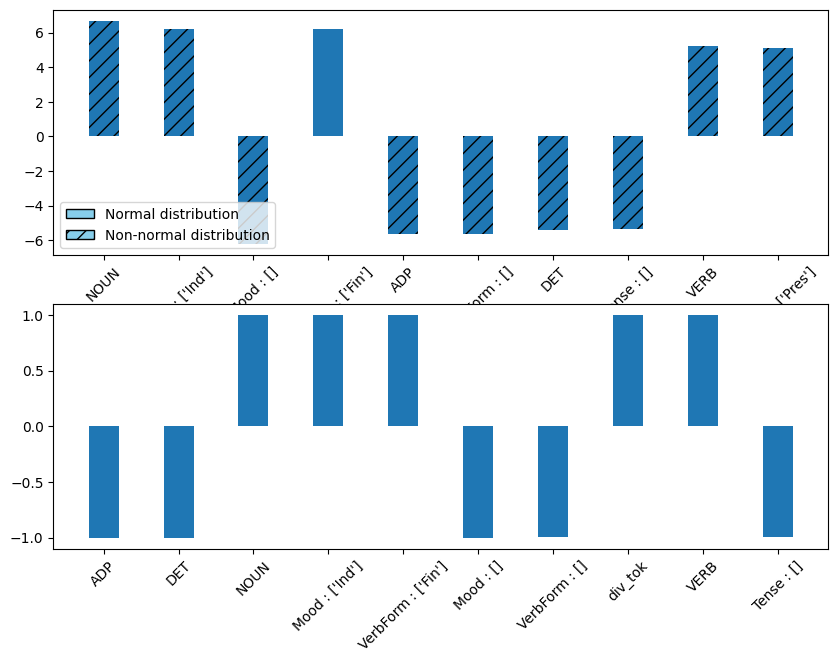

In [ ]:
(columns, delta, D, normality) = effect_size_distribution(df_wiki.to_numpy()[:,:],
                                        df_universalis.to_numpy()[:,:],
                                         columns=columns[:],
                                         path_figure="images/superiority.png")